#### Reviewing TSCA and other lists with the lens of the new universe

Created: 06 November 2023<br>
Last modified: 10 May 2024<br>
Changes: Updated to take into account the new inventory (April 2024)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
%matplotlib inline

In [2]:
TOP = os.getcwd().replace('notebooks','')
raw_dir= TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
interim_dir = TOP + 'data/interim/'
figures_dir = TOP + 'reports/figures/'

In [3]:
df = pd.read_excel(interim_dir+'final_universe_categorisations_wtsca_active_constraints_100524.xlsx', index_col = [0])

In [4]:
df.shape

(15525, 207)

In [5]:
df

,dtxsid,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,...,tsca_centroid_id2,tsca_analogues,tsca_dist,MaxMin_tsca_picks,tsca_active_centroid,tsca_active_centroid_id,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks
0,IROQAHVXXUQBOS-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCN(CCNC(=O)c1ccc(Cc2ccc(C(O)=O)cc2)cc1)S(=O)...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DTXSID90897582,DSSTox_High,4-(Perfluorononyl)oxybenzenesulfonate sodium,91998-13-9,Single Compound,NaN,[Na+].[O-]S(=O)(=O)C1=CC=C(OC(F)(F)C(F)(F)C(F)...,"InChI=1S/C15H5F19O4S.Na/c16-7(17,8(18,19)10(22...",WEKFOCTWTWPVEG-UHFFFAOYSA-M,C15H4F19NaO4S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID90896257,Public_Low,(2S)-2-{Bis[4-(heptadecafluorooctyl)phenyl][(t...,914391-37-0,Single Compound,NaN,CC[Si](CC)(CC)OC([C@@H]1CCCN1)(C1=CC=C(C=C1)C(...,"InChI=1S/C39H31F34NOSi/c1-4-76(5-2,6-3)75-23(2...",PARYPNCCAOUHML-QFIPXVFZSA-N,C39H31F34NOSi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DTXSID90896196,Public_Low,"2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,9-Heptadecaflu...",157584-47-9,Single Compound,NaN,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,"InChI=1S/C21H10F17NO/c22-14(23,13(40)39(11-7-3...",IDJHICNQDCLWAB-UHFFFAOYSA-N,C21H10F17NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DTXSID90896095,Public_Low,"3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,10-Heptadeca...",113823-56-6,Single Compound,NaN,CC1=CC=C(C=C1)S(=O)(=O)OCCC(F)(F)C(F)(F)C(F)(F...,"InChI=1S/C17H11F17O3S/c1-8-2-4-9(5-3-8)38(35,3...",WGCSEECKLMOBLT-UHFFFAOYSA-N,C17H11F17O3S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15520,ZIQDQEQBQRGFDF-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCC[P+](CCCC)(CCCC)(CC(C)=O).[N-](C)S(=O)(=O)...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15521,ZKYPCYQMVQMYAB-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCC[P+](CCCC)(CCCC)(CC(O)CC(O)=O).[O-]S(=O)(=...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15522,ZOJATUBFKQLTCD-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCCOP(C)(=O)(CCCC).OS(=O)(=O)C(F)(F)C(F)(F)C(...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15523,ZRONJOSZRXLGCA-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCCP(O)(=O)(CCCC).OS(=O)(=O)C(F)(F)C(F)(F)C(F...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.TSCA_STATUS.value_counts(dropna = False)

unclassified    14962
inactive          326
active            237
Name: TSCA_STATUS, dtype: int64

In [7]:
df[df['group_str'].isnull()]

,dtxsid,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,...,tsca_centroid_id2,tsca_analogues,tsca_dist,MaxMin_tsca_picks,tsca_active_centroid,tsca_active_centroid_id,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks


In [8]:
df.groupby(['category', 'subcategory', 'cluster_d', 'lvl_cluster_d']).size()

category        subcategory  cluster_d  lvl_cluster_d
Aromatic PFASs  lt7          2.0        1.0               235
                                        2.0               592
                                        3.0                89
                                        4.0               174
                                        5.0              1238
                                                         ... 
unclassified    lt7          2.0        2.0                 2
                                        3.0                13
                             3.0        1.0                22
                                        2.0                11
                                        3.0                20
Length: 74, dtype: int64

In [9]:
#df['group'] = df[['category','subcategory', 'cluster_d',  'lvl_cluster_d']].apply(tuple, axis = 1)
#df['group_str']=[str(e) for e in df['group'] ]

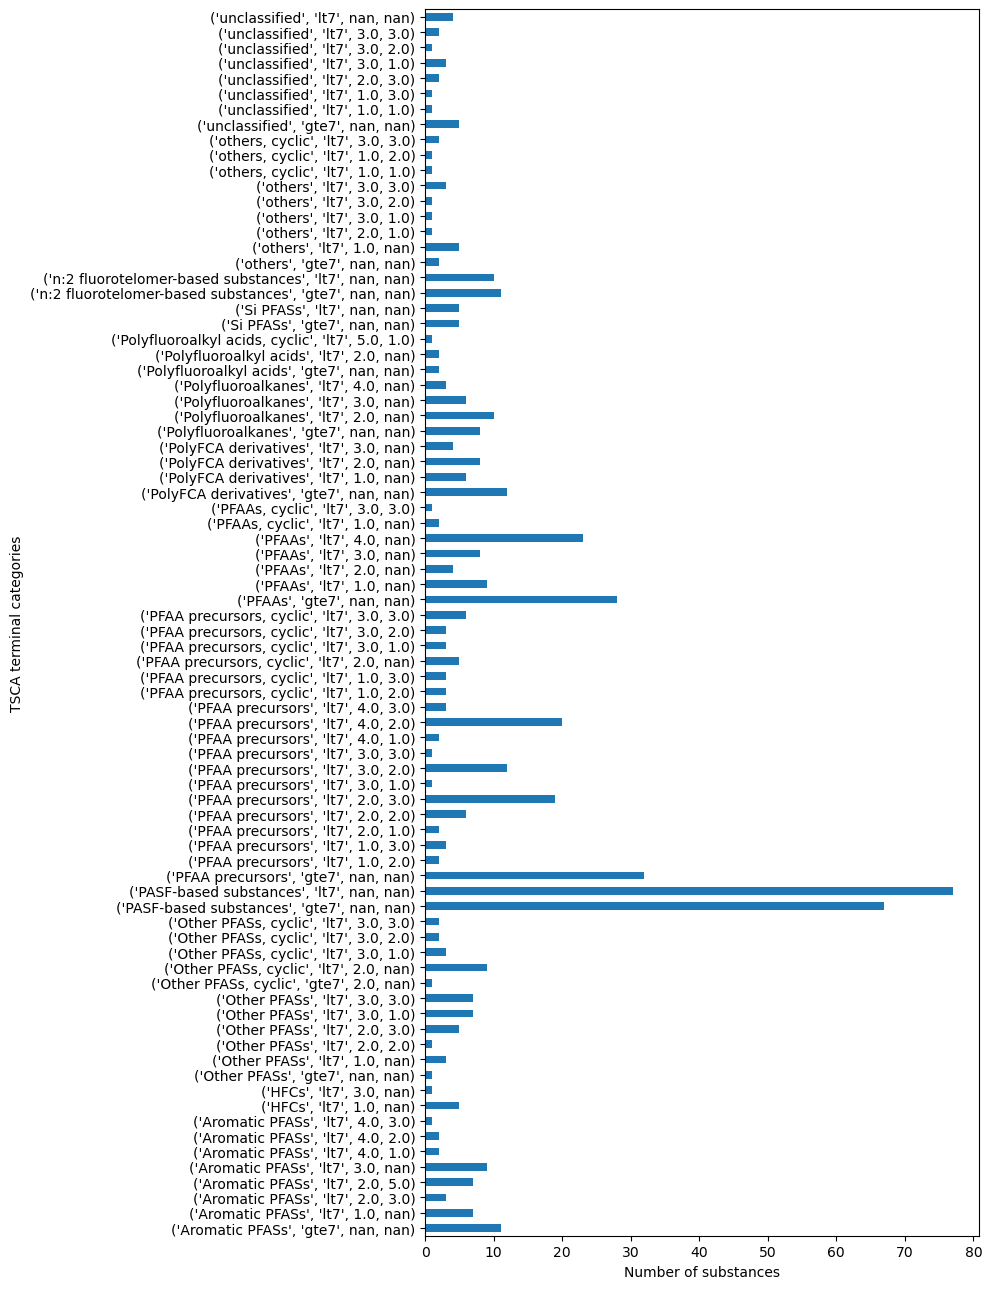

In [10]:
df[df['TSCA_STATUS']!='unclassified']['group_str'].value_counts().reset_index().sort_values('index').set_index('index').plot(kind = 'barh', figsize = (10,13), legend = False)
plt.ylabel('TSCA terminal categories')
plt.xlabel('Number of substances')
plt.tight_layout()
#plt.savefig(figures_dir+'Figure5.png', dpi = 300)

In [11]:
df[df['TSCA_STATUS']!= 'unclassified']['group_str'].value_counts().shape[0]/128

0.625

In [12]:
df[df['TSCA_STATUS']!= 'unclassified']['group_str'].value_counts().reset_index()

,index,group_str
0,"('PASF-based substances', 'lt7', nan, nan)",77
1,"('PASF-based substances', 'gte7', nan, nan)",67
2,"('PFAA precursors', 'gte7', nan, nan)",32
3,"('PFAAs', 'gte7', nan, nan)",28
4,"('PFAAs', 'lt7', 4.0, nan)",23
...,...,...
75,"('Polyfluoroalkyl acids, cyclic', 'lt7', 5.0, ...",1
76,"('others', 'lt7', 3.0, 2.0)",1
77,"('others', 'lt7', 3.0, 1.0)",1
78,"('others', 'lt7', 2.0, 1.0)",1


In [13]:
df[df['TSCA_STATUS']== 'active']['group_str'].value_counts().reset_index().shape[0]

60

In [14]:
df[df['TSCA_STATUS']== 'active']['group_str'].value_counts().reset_index()

,index,group_str
0,"('PASF-based substances', 'lt7', nan, nan)",20
1,"('PFAA precursors', 'gte7', nan, nan)",19
2,"('PASF-based substances', 'gte7', nan, nan)",18
3,"('PFAAs', 'lt7', 4.0, nan)",12
4,"('PFAAs', 'gte7', nan, nan)",11
5,"('PFAA precursors', 'lt7', 4.0, 2.0)",11
6,"('PFAA precursors', 'lt7', 3.0, 2.0)",9
7,"('Other PFASs, cyclic', 'lt7', 2.0, nan)",8
8,"('PFAAs', 'lt7', 1.0, nan)",8
9,"('n:2 fluorotelomer-based substances', 'lt7', ...",7


In [15]:
df1 = pd.merge(df['group_str'].value_counts().reset_index(), df[df['TSCA_STATUS'] !='unclassified']['group_str'].value_counts().reset_index(), on = 'index', how = 'left')

In [16]:
df1 = pd.merge(df1, df[df['TSCA_STATUS']== 'active']['group_str'].value_counts().reset_index(), on = 'index', how = 'left')

In [17]:
df1.columns = ['Terminal_category', 'Total', 'TSCA_only', 'TSCA_active_only']

In [18]:
df1['TSCA_only'] =df1['TSCA_only'].replace(np.nan, 0)

In [19]:
df1['TSCA_active_only'] =df1['TSCA_active_only'].replace(np.nan, 0)

In [22]:
df1[df1['TSCA_only']==0].sort_values('Terminal_category')

,Terminal_category,Total,TSCA_only,TSCA_active_only
18,"('Aromatic PFASs', 'lt7', 2.0, 1.0)",235,0.0,0.0
3,"('Aromatic PFASs', 'lt7', 2.0, 2.0)",592,0.0,0.0
28,"('Aromatic PFASs', 'lt7', 2.0, 4.0)",174,0.0,0.0
35,"('HFCs', 'gte7', nan, nan)",125,0.0,0.0
75,"('HFCs', 'lt7', 2.0, nan)",53,0.0,0.0
81,"('Other PFASs', 'lt7', 2.0, 1.0)",49,0.0,0.0
57,"('Other PFASs', 'lt7', 3.0, 2.0)",81,0.0,0.0
124,"('Other PFASs, cyclic', 'gte7', 1.0, nan)",2,0.0,0.0
126,"('Other PFASs, cyclic', 'gte7', 3.0, nan)",2,0.0,0.0
120,"('Other PFASs, cyclic', 'gte7', 4.0, nan)",6,0.0,0.0


In [21]:
#df1[df1['TSCA_active_only']==0].sort_values('Terminal_category')

In [24]:
df2 = df1.melt(id_vars = ['Terminal_category'], value_vars = ['Total', 'TSCA_only', 'TSCA_active_only'], var_name = 'Inventory')

In [25]:
df2['Inventory'] = df2['Inventory'].replace('Total', 'Unconstrained')

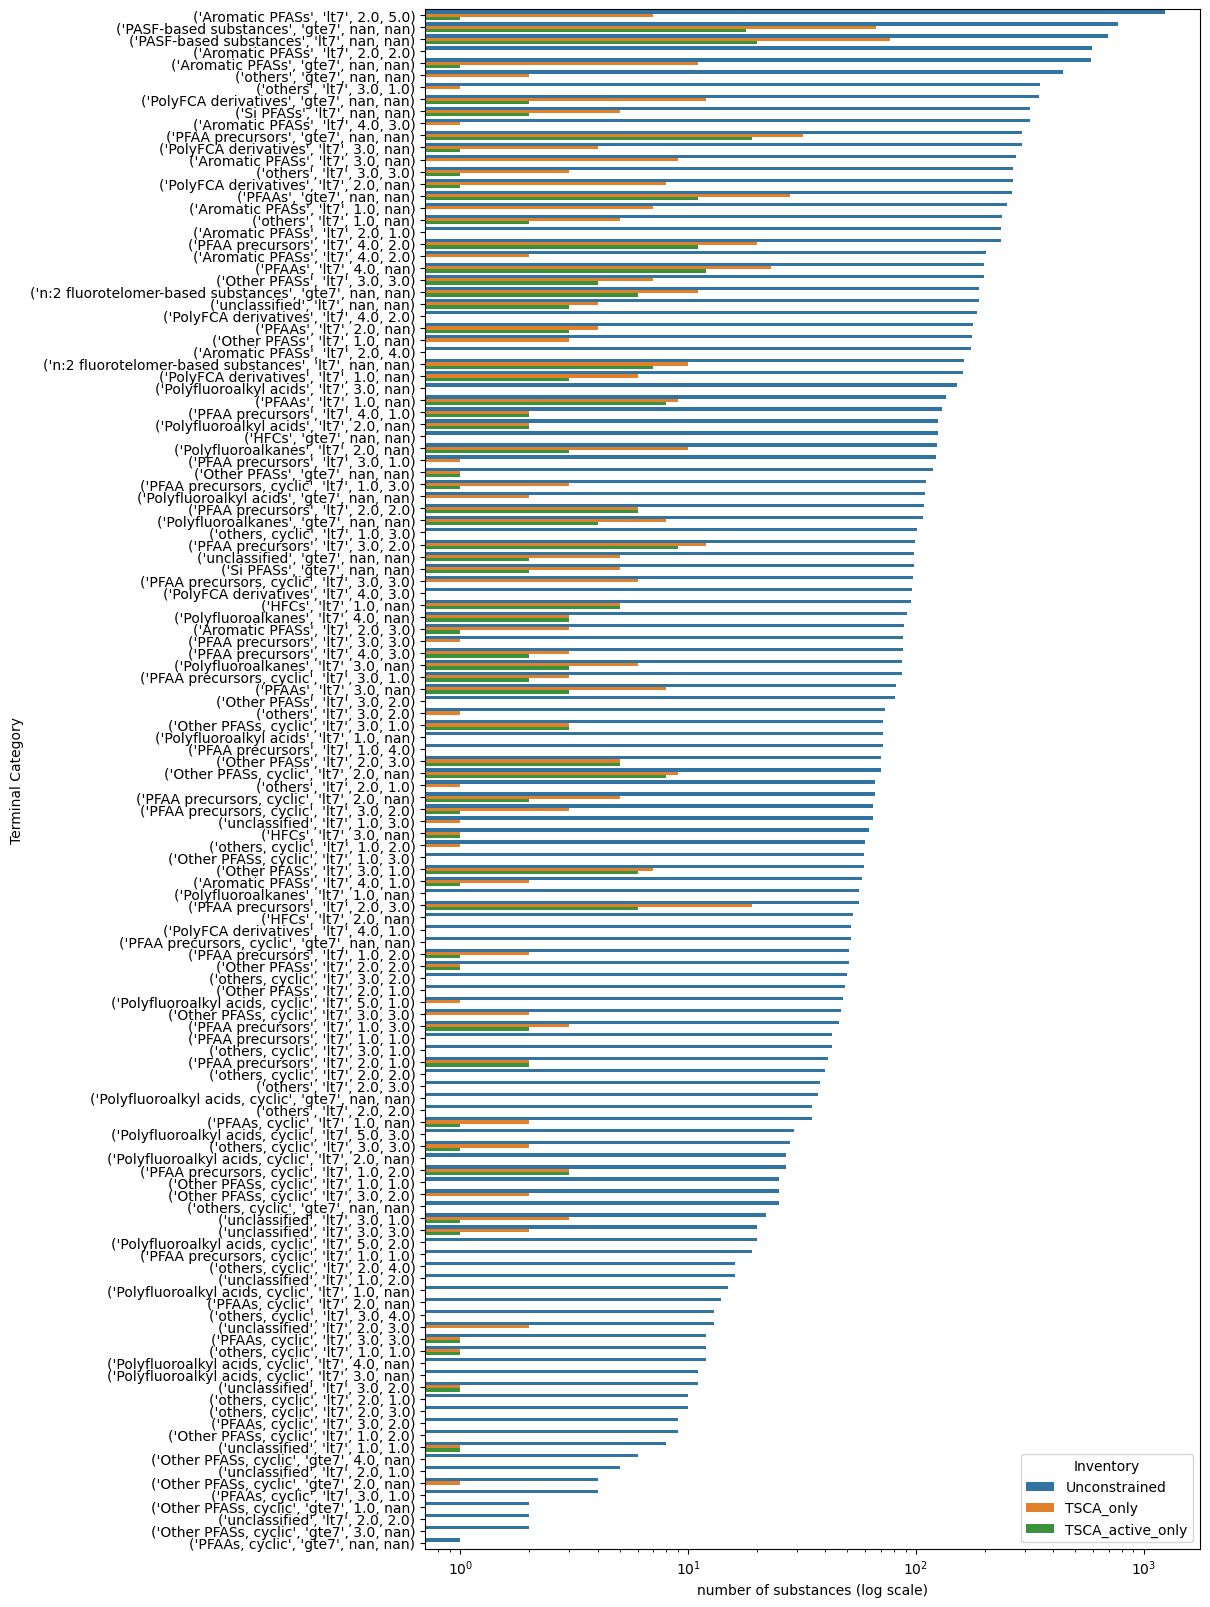

In [28]:
f,ax = plt.subplots(figsize = (10,20))
ax = sns.barplot(y = 'Terminal_category', x = 'value', hue = 'Inventory', data = df2)
ax.set_xscale('log')
ax.set_xlabel('number of substances (log scale)')
ax.set_ylabel('Terminal Category')
f.savefig(figures_dir+'FigureS3_100524.png', dpi = 300, bbox_inches = 'tight')

In [29]:
ccd = pd.read_excel(interim_dir+'CCD_CDR2020_271022.xlsx')


In [30]:
ccd.shape

(8017, 10)

In [31]:
pv_dict = {k:v for k,v in zip(ccd['DTXSID'], ccd['2019 NATIONALLY AGGREGATED PV-v1'])}

In [32]:
#pv_dict

In [33]:
df['CDR2019_NATIONAL_AGG_PV'] = df['dtxsid'].replace(pv_dict)

In [34]:
df['CDR2019_NATIONAL_AGG_PV'] = df['CDR2019_NATIONAL_AGG_PV'].apply(lambda x : np.nan if 'DTXSID' in x or 'UHFFFA' in x else x)

In [35]:
df['CDR2019_NATIONAL_AGG_PV'].value_counts()

<1,000,000 lb                      47
1,000,000 - <20,000,000 lb         19
<25,000 lb                          4
25,000 - <100,000 lb                3
20,000,000 - <100,000,000 lb        3
100,000 - <500,000 lb               2
50,000,000 - <100,000,000 lb        1
100,000,000 - <250,000,000 lb       1
100,000,000 - <1,000,000,000 lb     1
500,000 - <1,000,000 lb             1
1,000,000 - <10,000,000 lb          1
Name: CDR2019_NATIONAL_AGG_PV, dtype: int64

In [36]:
ccd = pd.read_excel(external_dir+'CDR2020_CCD_v2.xlsx')
ccd = ccd[ccd['DTXSID'].notnull()]
cdr2020_ids = ccd['DTXSID'].tolist()

In [37]:
df['CDR2020_STATUS'] = df['dtxsid'].apply(lambda x: 1 if x in cdr2020_ids else np.nan)

In [38]:
df['CDR2020_STATUS'].value_counts(dropna = False)

NaN    15442
1.0       83
Name: CDR2020_STATUS, dtype: int64

In [39]:
test_df = df[df['CDR2020_STATUS'] ==1]

In [40]:
test_df_pvt = pd.pivot_table(data = test_df, index = 'category', columns = 'CDR2019_NATIONAL_AGG_PV', values = 'CDR2020_STATUS', aggfunc = np.sum, fill_value = 0)


In [41]:
test_df_pvt = test_df_pvt.reset_index()

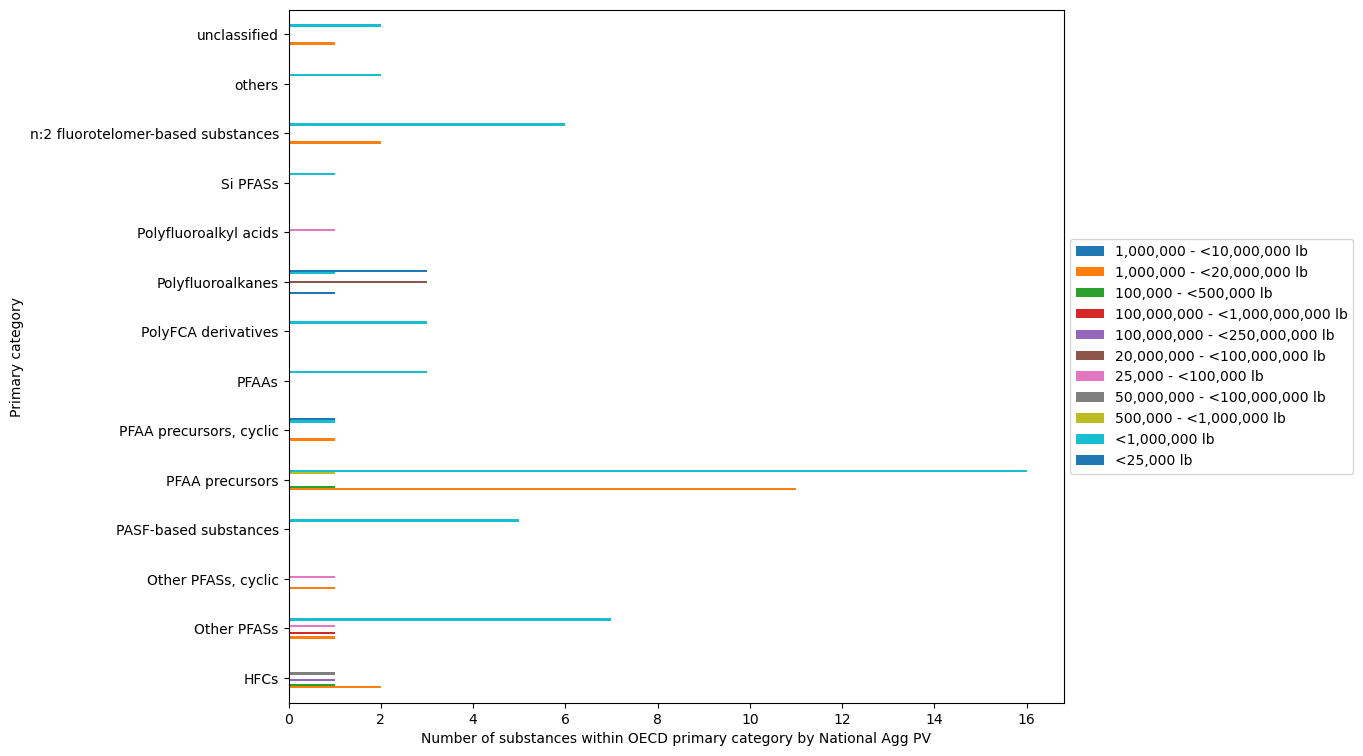

In [42]:
test_df_pvt.plot(x='category',
        kind='barh',
        stacked=False,figsize = (10,9)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Number of substances within OECD primary category by National Agg PV')
plt.ylabel('Primary category')
plt.savefig(figures_dir+'FigureS4_100524.png', dpi = 300, bbox_inches = 'tight');

In [43]:
df['CDR2019_NATIONAL_AGG_PV'].value_counts()

<1,000,000 lb                      47
1,000,000 - <20,000,000 lb         19
<25,000 lb                          4
25,000 - <100,000 lb                3
20,000,000 - <100,000,000 lb        3
100,000 - <500,000 lb               2
50,000,000 - <100,000,000 lb        1
100,000,000 - <250,000,000 lb       1
100,000,000 - <1,000,000,000 lb     1
500,000 - <1,000,000 lb             1
1,000,000 - <10,000,000 lb          1
Name: CDR2019_NATIONAL_AGG_PV, dtype: int64

In [44]:
df['CDR2019_NATIONAL_AGG_PV'].value_counts()

<1,000,000 lb                      47
1,000,000 - <20,000,000 lb         19
<25,000 lb                          4
25,000 - <100,000 lb                3
20,000,000 - <100,000,000 lb        3
100,000 - <500,000 lb               2
50,000,000 - <100,000,000 lb        1
100,000,000 - <250,000,000 lb       1
100,000,000 - <1,000,000,000 lb     1
500,000 - <1,000,000 lb             1
1,000,000 - <10,000,000 lb          1
Name: CDR2019_NATIONAL_AGG_PV, dtype: int64

In [45]:
writer = pd.ExcelWriter(interim_dir+'final_universe_categorisations_wCDR_100524.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

df.to_excel(writer)

writer.close()
